In [28]:
#%% file import pre procesing
import pandas as pd
import numpy as np



#plots
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [29]:
# read in pup merged file 
le16_df = pd.read_excel('le16_p21_calls.xlsx')
le15_df = pd.read_excel('le15_p21_calls.xlsx')

pup_df = pd.concat([le16_df,le15_df])
pup_df

,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Rat
0,D:\Rat Pup call analysis\litter le 16 fmr1\p21...,1,Usv,True,0.713953,23.197377,23.209553,0.012176,43.971920,40.892210,52.595109,11.702899,4.120947,652.764650,3.291793,-87.460765,0.327004,43.355978,WT,581
1,D:\Rat Pup call analysis\litter le 16 fmr1\p21...,2,Usv,True,0.549356,34.503751,34.507727,0.003976,48.625000,47.125000,50.625000,3.500000,1.274755,-704.142012,1.254464,-94.324330,0.243807,48.125000,WT,581
2,D:\Rat Pup call analysis\litter le 16 fmr1\p21...,3,Usv,True,0.821904,35.894499,35.904440,0.009941,53.074905,50.479485,55.670324,5.190840,1.792516,-471.804766,1.916897,-84.269206,0.362974,55.670324,WT,581
3,D:\Rat Pup call analysis\litter le 16 fmr1\p21...,4,Usv,True,0.616676,46.401397,46.422632,0.021235,48.067736,46.732657,49.402814,2.670157,0.802282,83.618077,1.285467,-93.533596,0.268260,48.067736,WT,581
4,D:\Rat Pup call analysis\litter le 16 fmr1\p21...,5,Usv,True,0.534498,47.289556,47.321114,0.031559,38.160473,35.403716,40.457770,5.054054,1.650525,-10.957306,1.342536,-103.678281,0.248350,38.160473,WT,581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,D:\Rat Pup call analysis\litter le15 fmr1\p21\...,7,Usv,True,0.510165,262.427458,262.451428,0.023971,52.294862,50.208972,59.074003,8.865031,3.372815,379.974859,2.118734,-81.808928,0.363738,57.509586,KO,568
163,D:\Rat Pup call analysis\litter le15 fmr1\p21\...,8,Usv,True,0.599161,276.125052,276.137076,0.012024,42.633929,40.610119,45.814201,5.204082,1.767577,-350.606625,1.499081,-92.748030,0.331782,44.079507,KO,568
164,D:\Rat Pup call analysis\litter le15 fmr1\p21\...,9,Usv,True,0.801063,281.597402,281.609867,0.012465,41.227134,39.672256,42.782012,3.109756,0.913195,-119.990364,2.047019,-93.415067,0.274236,42.263720,KO,568
165,D:\Rat Pup call analysis\litter le15 fmr1\p21\...,10,Short,True,0.507565,297.171775,297.191657,0.019882,60.464127,56.440459,62.978920,6.538462,2.564596,-204.762765,1.927784,-103.334578,0.186174,60.464127,KO,568


In [30]:
# if row contains iso1 set iso 1 in timepoint column'


pup_df['Timepoint'] = pup_df["File"].str.extract("(iso1|iso2)")[0] #grab isolation from filename
#pup_df['Rat'] = pup_df['File'].str.extract(r'Detections\\(.*?_)') # grab rat name in filename
#('(fxs_calls\.*?)\_')
pup_df['Timepoint'].unique()

array(['iso1', 'iso2'], dtype=object)

# Call Number comparison

In [31]:
# call number compared
pup_df_g = pup_df.groupby(['Genotype','Timepoint']).count() # counts number of rows(calls) per rat
pup_df_g = pup_df_g.reset_index() # adds indices back to columns for graphing


In [32]:
pup_df_rat_avg = pup_df.groupby(['Rat','Genotype','Timepoint']).mean()
pup_df_rat_avg = pup_df_rat_avg.reset_index()
pup_df_rat_avg

C:\Users\User\AppData\Local\Temp\ipykernel_14896\4212151507.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pup_df_rat_avg = pup_df.groupby(['Rat','Genotype','Timepoint']).mean()


,Rat,Genotype,Timepoint,ID,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz)
0,563,WT,iso1,2.5,1.0,0.567868,166.633665,166.651567,0.017901,45.419621,44.462750,48.139384,3.676634,1.349396,36.881098,1.971086,-101.104454,0.230393,45.320823
1,563,WT,iso2,7.5,1.0,0.583520,172.652106,172.672648,0.020543,48.546121,45.890878,50.418392,4.527514,1.754080,-53.759021,1.937255,-100.658834,0.228743,48.452831
2,564,KO,iso1,14.5,1.0,0.628205,93.875296,93.888939,0.013643,51.917032,48.589148,53.704036,5.114889,1.743511,198.257281,1.868485,-90.859670,0.348303,51.829625
3,564,KO,iso2,11.0,1.0,0.581103,191.090734,191.106541,0.015807,49.357547,47.070678,51.379327,4.308648,1.649169,180.179915,1.606454,-99.326762,0.256969,49.446130
4,565,KO,iso1,7.5,1.0,0.610934,157.423004,157.439486,0.016482,53.639345,50.643988,56.333107,5.689119,1.955957,-262.821247,2.135619,-96.020067,0.249720,53.692649
5,565,KO,iso2,8.0,1.0,0.574795,137.635700,137.658235,0.022535,49.947882,48.209130,52.211936,4.002807,1.522286,-49.934245,1.777586,-103.691825,0.210181,49.922998
6,566,KO,iso1,6.5,1.0,0.637121,108.558021,108.570911,0.012890,46.391732,43.246708,49.947520,6.700812,2.480573,-36.335461,2.016986,-93.886865,0.267608,45.147337
7,566,KO,iso2,13.0,1.0,0.664549,210.243151,210.335720,0.092569,44.353994,41.537012,47.060381,5.523369,1.866750,18.841323,1.517458,-92.651638,0.365961,44.849238
8,568,KO,iso1,12.0,1.0,0.624267,131.752081,131.769343,0.017261,50.720194,47.726894,53.564244,5.837350,2.082985,-27.227360,2.115055,-94.721274,0.294049,49.878573
9,568,KO,iso2,6.0,1.0,0.563111,196.353974,196.377718,0.023744,55.179929,52.514564,57.828035,5.313471,1.925019,-24.891398,1.870378,-98.819318,0.227182,55.554714


### Call number graphs

Text(0.5, 1.0, 'Average Call Number p3')

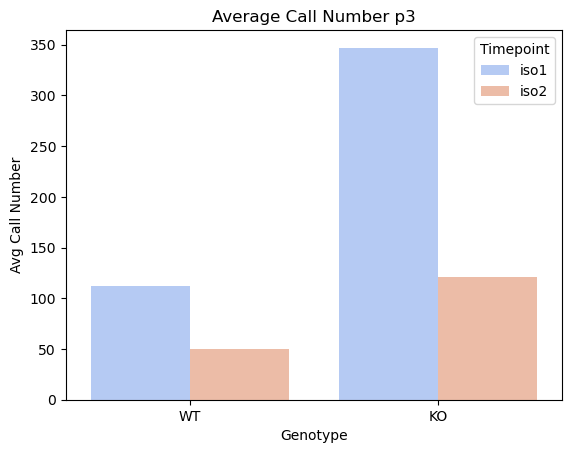

In [5]:
# graph male genotype differences in average call number

sns.barplot(data = pup_df_g,x = 'Genotype',y='File',hue='Timepoint', hue_order = ['iso1', 'iso2'],order = ['WT','KO'],palette='coolwarm')
plt.ylabel('Avg Call Number')
plt.xlabel('Genotype')
plt.title('Average Call Number p3')   


In [33]:
# graph male genotype differences in call number over time
first_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 0) & (pup_df['Begin Time (s)'] <= 60)] #get indexes from time range
pup_df.loc[first_min_ind, 'Minute'] = 1 # add label for graphing to indicate timepoint

sec_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 61) & (pup_df['Begin Time (s)'] <= 120)]
pup_df.loc[sec_min_ind, 'Minute'] = 2

thrd_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 121) & (pup_df['Begin Time (s)'] <= 180)]
pup_df.loc[thrd_min_ind, 'Minute'] = 3

four_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 181) & (pup_df['Begin Time (s)'] <= 300)]
pup_df.loc[four_min_ind, 'Minute'] = 4

pup_df_min_g = pup_df.groupby(['Genotype','Timepoint','Minute']).count() # count number of calls per minute
pup_df_min_g = pup_df_min_g.reset_index() # adds indices back to columns for graphing
pup_df_min_g


,Genotype,Timepoint,Minute,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),...,Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Rat
0,KO,iso1,1.0,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
1,KO,iso1,2.0,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
2,KO,iso1,3.0,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
3,KO,iso1,4.0,210,210,210,210,210,210,210,...,210,210,210,210,210,210,210,210,210,210
4,KO,iso2,1.0,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
5,KO,iso2,2.0,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
6,KO,iso2,3.0,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
7,KO,iso2,4.0,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
8,WT,iso1,1.0,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
9,WT,iso1,2.0,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


Text(0.5, 1.0, 'Avg Call per Minute Male')

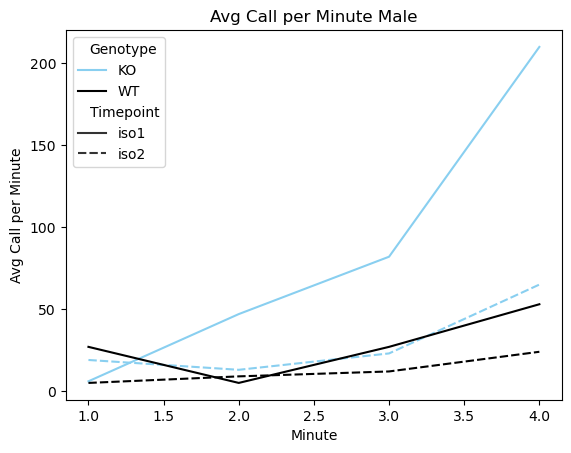

In [7]:
# cont
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=pup_df_min_g,x='Minute',y='ID',hue='Genotype',style='Timepoint',hue_order=['KO','WT'])
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute Male') 

Text(0.5, 1.0, 'Avg Call per Minute 1st Isolation')

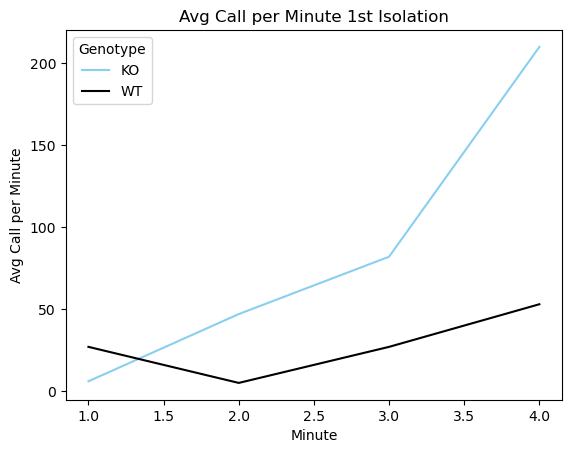

In [8]:
# graph just pre-mom
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
test = pup_df_min_g.loc[pup_df_min_g['Timepoint'] == 'iso1']
sns.lineplot(data=test,x='Minute',y='ID',hue='Genotype')
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute 1st Isolation') 

Text(0.5, 1.0, 'Avg Call per Minute 2nd Isolation')

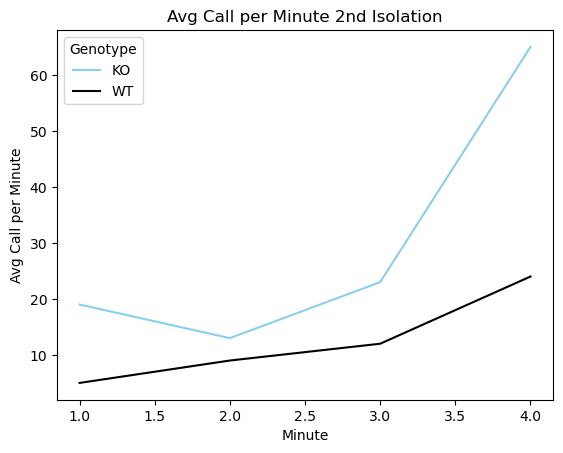

In [9]:
# graph just post-mom
test = pup_df_min_g.loc[pup_df_min_g['Timepoint'] == 'iso2']
sns.lineplot(data=test,x='Minute',y='ID',hue='Genotype')
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute 2nd Isolation') 

# Duration Comparison

Text(0.5, 1.0, 'Avg Duration')

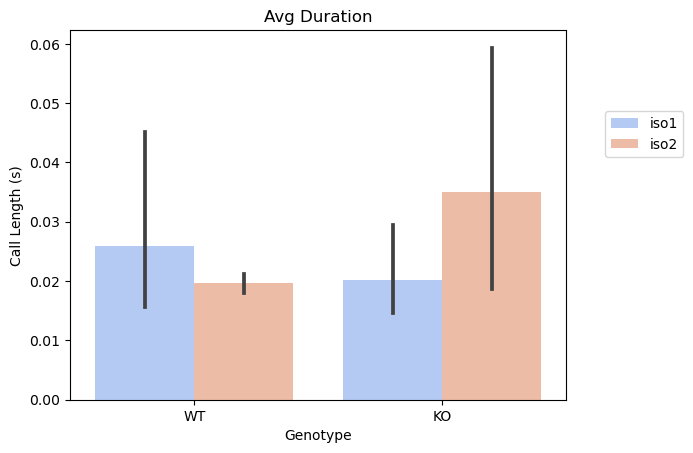

In [34]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Call Length (s)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Duration') 

Text(0.5, 1.0, 'Avg Duration per Minute')

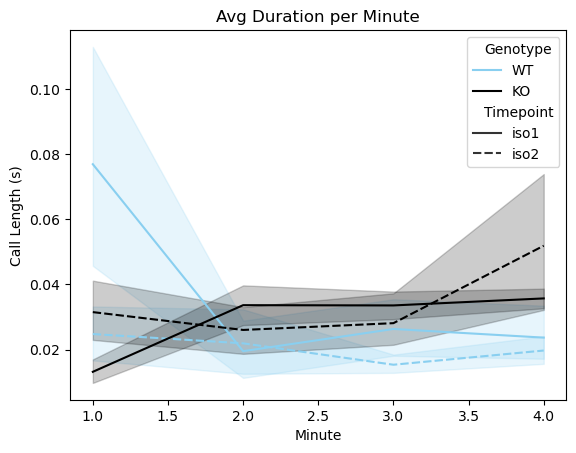

In [35]:
# duration over time both
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Call Length (s)',hue='Genotype',style='Timepoint')
plt.title('Avg Duration per Minute') 

# Principal Freq

In [36]:
pup_df
test = pup_df.reset_index()
test

,index,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),...,Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Rat,Timepoint,Minute
0,0,D:\Rat Pup call analysis\litter le 16 fmr1\p21...,1,Usv,True,0.713953,23.197377,23.209553,0.012176,43.971920,...,4.120947,652.764650,3.291793,-87.460765,0.327004,43.355978,WT,581,iso1,1.0
1,1,D:\Rat Pup call analysis\litter le 16 fmr1\p21...,2,Usv,True,0.549356,34.503751,34.507727,0.003976,48.625000,...,1.274755,-704.142012,1.254464,-94.324330,0.243807,48.125000,WT,581,iso1,1.0
2,2,D:\Rat Pup call analysis\litter le 16 fmr1\p21...,3,Usv,True,0.821904,35.894499,35.904440,0.009941,53.074905,...,1.792516,-471.804766,1.916897,-84.269206,0.362974,55.670324,WT,581,iso1,2.0
3,3,D:\Rat Pup call analysis\litter le 16 fmr1\p21...,4,Usv,True,0.616676,46.401397,46.422632,0.021235,48.067736,...,0.802282,83.618077,1.285467,-93.533596,0.268260,48.067736,WT,581,iso1,2.0
4,4,D:\Rat Pup call analysis\litter le 16 fmr1\p21...,5,Usv,True,0.534498,47.289556,47.321114,0.031559,38.160473,...,1.650525,-10.957306,1.342536,-103.678281,0.248350,38.160473,WT,581,iso1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,162,D:\Rat Pup call analysis\litter le15 fmr1\p21\...,7,Usv,True,0.510165,262.427458,262.451428,0.023971,52.294862,...,3.372815,379.974859,2.118734,-81.808928,0.363738,57.509586,KO,568,iso2,4.0
626,163,D:\Rat Pup call analysis\litter le15 fmr1\p21\...,8,Usv,True,0.599161,276.125052,276.137076,0.012024,42.633929,...,1.767577,-350.606625,1.499081,-92.748030,0.331782,44.079507,KO,568,iso2,4.0
627,164,D:\Rat Pup call analysis\litter le15 fmr1\p21\...,9,Usv,True,0.801063,281.597402,281.609867,0.012465,41.227134,...,0.913195,-119.990364,2.047019,-93.415067,0.274236,42.263720,KO,568,iso2,4.0
628,165,D:\Rat Pup call analysis\litter le15 fmr1\p21\...,10,Short,True,0.507565,297.171775,297.191657,0.019882,60.464127,...,2.564596,-204.762765,1.927784,-103.334578,0.186174,60.464127,KO,568,iso2,4.0


Text(0.5, 1.0, 'Avg Principal Frequency')

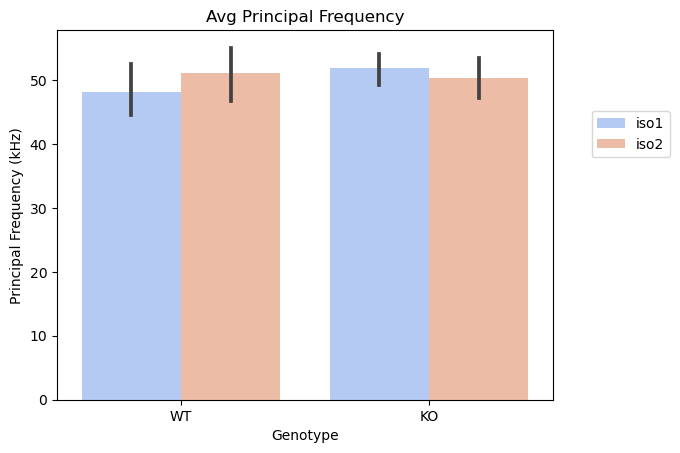

In [38]:
# both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Principal Frequency (kHz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Principal Frequency') 

# Slope Comparison

Text(0.5, 1.0, 'Avg Slope')

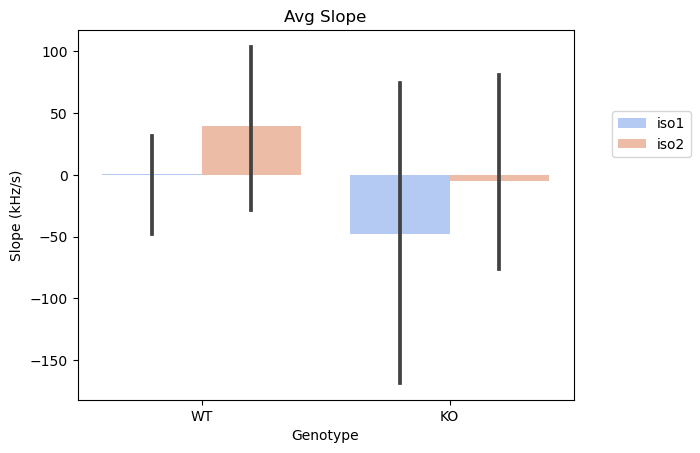

In [39]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Slope (kHz/s)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Slope') 


Text(0.5, 1.0, 'Avg Slope per Minute')

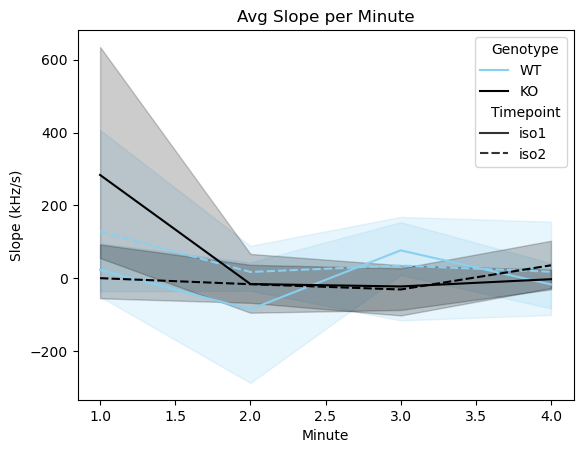

In [15]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Slope (kHz/s)',hue='Genotype',style='Timepoint')
plt.title('Avg Slope per Minute') 

# Delta Frequency 


Text(0.5, 1.0, 'Avg Delta Frequency')

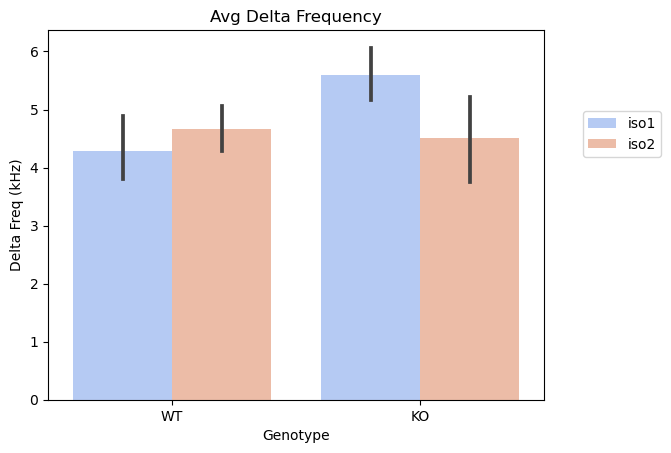

In [40]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Delta Freq (kHz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Delta Frequency') 


Text(0.5, 1.0, 'Avg Delta Frequency per Minute')

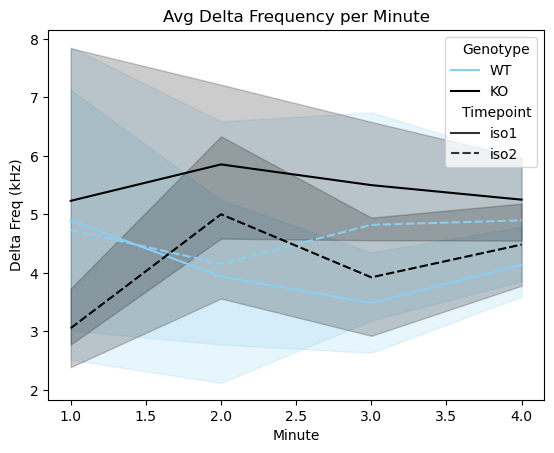

In [17]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Delta Freq (kHz)',hue='Genotype',style='Timepoint')
plt.title('Avg Delta Frequency per Minute') 

# Sinusoity

Text(0.5, 1.0, 'Avg Sinuosity Frequency')

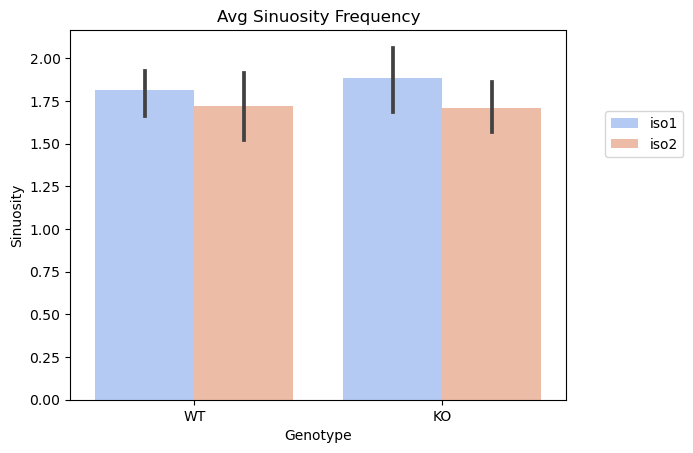

In [41]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Sinuosity',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Sinuosity Frequency')

Text(0.5, 1.0, 'Avg Sinuosity per Minute')

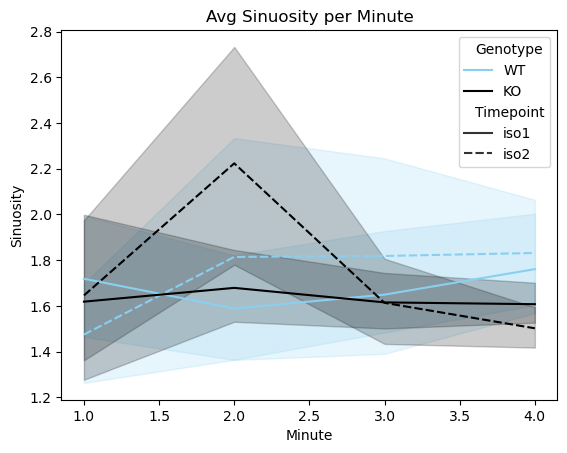

In [19]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Sinuosity',hue='Genotype',style='Timepoint')
plt.title('Avg Sinuosity per Minute') 

# Mean Power


Text(0.5, 1.0, 'Avg Mean Power (dB/Hz)')

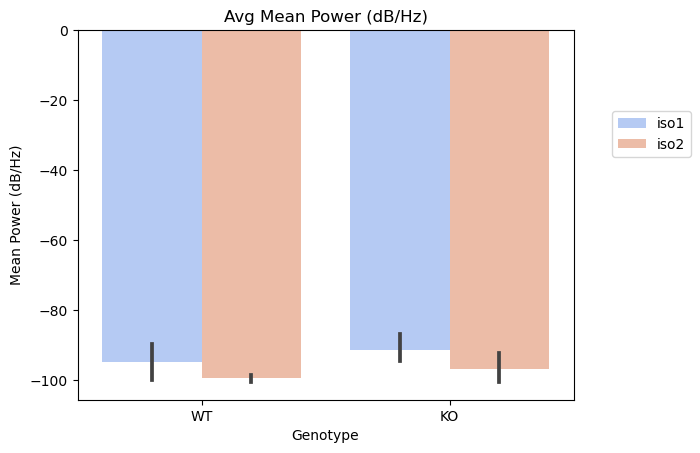

In [42]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Mean Power (dB/Hz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Mean Power (dB/Hz)')

Text(0.5, 1.0, 'Avg Mean Power per Minute')

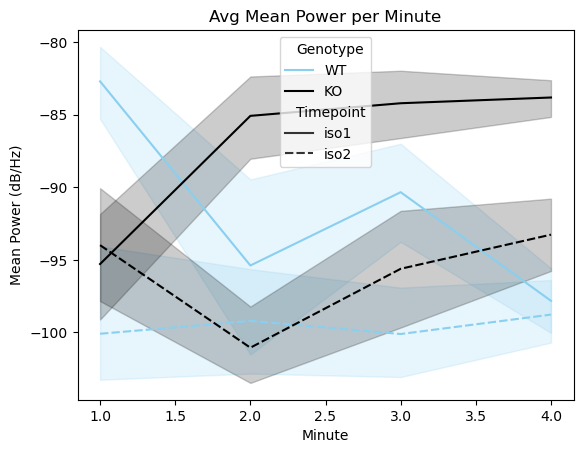

In [21]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Mean Power (dB/Hz)',hue='Genotype',style='Timepoint')
plt.title('Avg Mean Power per Minute') 

# Tonality

Text(0.5, 1.0, 'Avg Tonality')

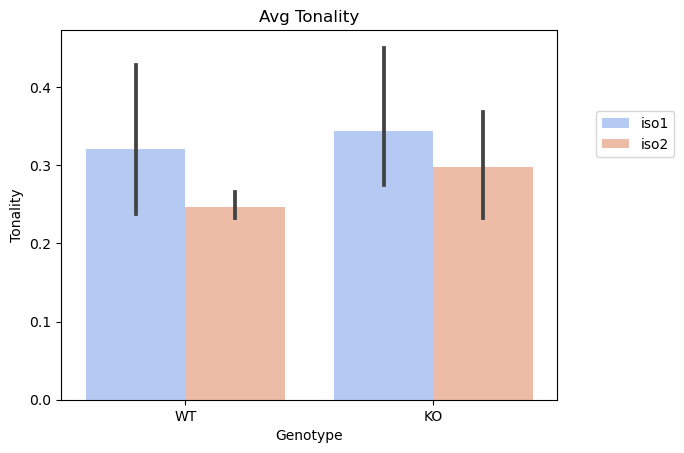

In [43]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Tonality',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Tonality')

Text(0.5, 1.0, 'Avg Tonality per Minute')

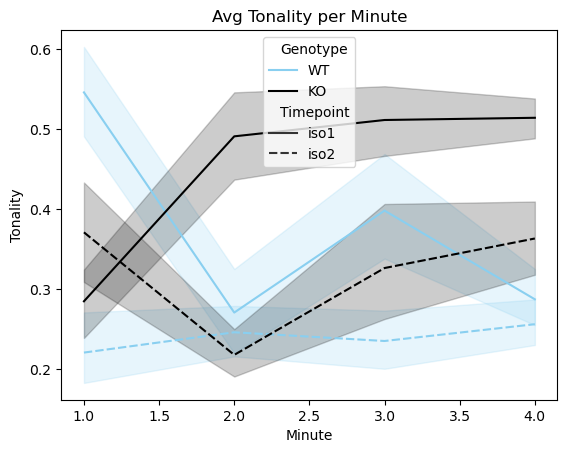

In [23]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Tonality',hue='Genotype',style='Timepoint')
plt.title('Avg Tonality per Minute') 

# Call Type Comparison

In [24]:
# pie chart between wt and het
KO_flat_df = pup_df.loc[pup_df['Genotype'] == 'KO']
wt_flat_df = pup_df.loc[pup_df['Genotype'] == 'WT']
wt_flat_df

,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),...,Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Timepoint,Minute
0,D:\Rat Pup call analysis\litter le 16 fmr1\p21...,1,Usv,True,0.713953,23.197377,23.209553,0.012176,43.971920,40.892210,...,11.702899,4.120947,652.764650,3.291793,-87.460765,0.327004,43.355978,WT,iso1,1.0
1,D:\Rat Pup call analysis\litter le 16 fmr1\p21...,2,Usv,True,0.549356,34.503751,34.507727,0.003976,48.625000,47.125000,...,3.500000,1.274755,-704.142012,1.254464,-94.324330,0.243807,48.125000,WT,iso1,1.0
2,D:\Rat Pup call analysis\litter le 16 fmr1\p21...,3,Usv,True,0.821904,35.894499,35.904440,0.009941,53.074905,50.479485,...,5.190840,1.792516,-471.804766,1.916897,-84.269206,0.362974,55.670324,WT,iso1,2.0
3,D:\Rat Pup call analysis\litter le 16 fmr1\p21...,4,Usv,True,0.616676,46.401397,46.422632,0.021235,48.067736,46.732657,...,2.670157,0.802282,83.618077,1.285467,-93.533596,0.268260,48.067736,WT,iso1,2.0
4,D:\Rat Pup call analysis\litter le 16 fmr1\p21...,5,Usv,True,0.534498,47.289556,47.321114,0.031559,38.160473,35.403716,...,5.054054,1.650525,-10.957306,1.342536,-103.678281,0.248350,38.160473,WT,iso1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,D:\Rat Pup call analysis\litter le15 fmr1\p21\...,14,Usv,True,0.607556,276.523509,276.543309,0.019800,42.677450,41.396043,...,2.562814,0.955104,-30.882750,1.388864,-101.269461,0.254126,42.677450,WT,iso2,4.0
14,D:\Rat Pup call analysis\litter le15 fmr1\p21\...,1,Usv,True,0.517279,46.120931,46.141767,0.020835,32.945374,32.610728,...,1.003937,0.331644,-36.213525,1.051502,-107.362243,0.230142,32.945374,WT,iso1,3.0
15,D:\Rat Pup call analysis\litter le15 fmr1\p21\...,2,Usv,True,0.653165,104.292531,104.299360,0.006829,51.867733,51.867733,...,6.589147,2.565164,347.334896,3.354073,-88.846972,0.268898,51.867733,WT,iso1,3.0
16,D:\Rat Pup call analysis\litter le15 fmr1\p21\...,3,Usv,True,0.543368,240.628458,240.649105,0.020647,43.974359,41.976496,...,3.269231,1.132162,-71.913816,2.216418,-104.143321,0.212304,43.792735,WT,iso1,4.0


<Axes: >

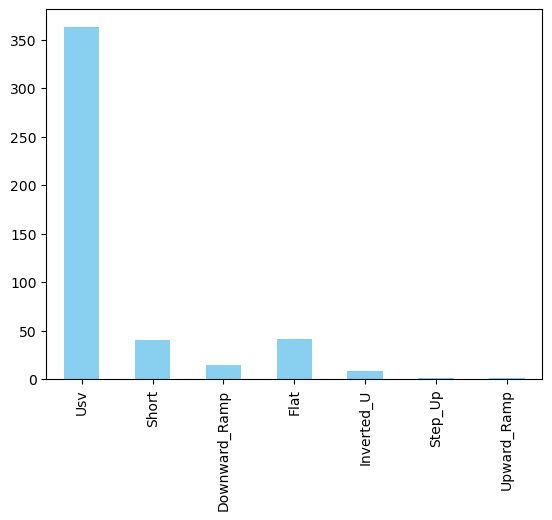

In [47]:
wt_flat_df['Label'].value_counts(sort=False).plot.bar()


<Axes: >

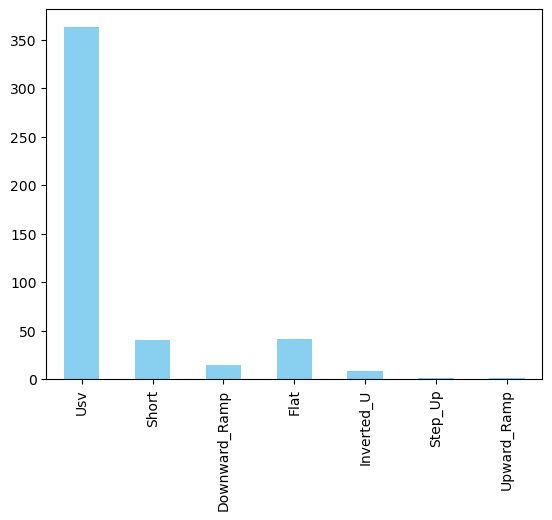

In [46]:

KO_flat_df['Label'].value_counts(sort=False).plot.bar()